In [34]:
import numpy as np 
from scipy.stats import norm 

import matplotlib.pyplot as plt 
from ipywidgets import interactive

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern 

In [35]:
def objfunc(x: np.ndarray, noise: float):
    return np.sin(x) + noise * np.random.randn(*x.shape)

kernel = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.01)


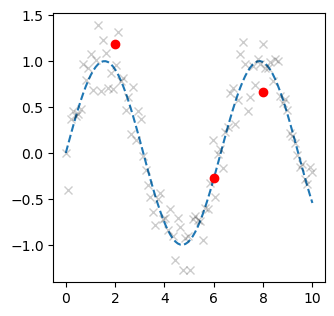

In [36]:
x = np.linspace(0, 10, 100)
X_sample = np.array([2, 6, 8])
Y_sample = objfunc(X_sample, 0.2)

fig, ax = plt.subplots(figsize=(3.5, 3.5))

plt.plot(x, objfunc(x, 0.0), '--', label='Noise-free obective')
plt.plot(x, objfunc(x, 0.2), 'kx', alpha=0.2, label='Noisy sanples')
plt.plot(X_sample, Y_sample, 'ro', label='Sampled')

In [47]:
def expected_improvement(x, X_samped, Y_sampled, gpr, xi=0.01):
    """
    
    """
    x = np.array([[x]])
    mu, sigma = gpr.predict(x.reshape(-1,1), return_std=True)
    mu_sample = gpr.predict(X_samped.reshape(-1,1))

    if sigma != 0:
        mu_sample_max = np.max(mu_sample)
        imp = mu - mu_sample_max - xi  # improvement
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
    else: 
        ei = 0 
    return ei







In [48]:
gpr.fit(X_sample.reshape(-1, 1), Y_sample.reshape(-1, 1))

GaussianProcessRegressor(alpha=0.01,
                         kernel=1**2 * Matern(length_scale=1, nu=2.5))

In [49]:
expected_improvement(5, X_sample, Y_sample, gpr)

array([0.02418617])